### **1. Import Dataset**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
from bs4 import BeautifulSoup
import html

In [4]:
# Load the dataset
emails_df = pd.read_csv('datasets/Phishing_Email.csv')  # Adjust the file path as needed

# Display the first few rows of the dataset
emails_df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [5]:
# Check for missing values
print(emails_df.isnull().sum())

# Display basic statistics
emails_df.describe()

# Display the distribution of labels
emails_df['Email Type'].value_counts()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64


Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

In [6]:
# Drop rows with missing values
emails_df = emails_df.dropna()

# Remove duplicate rows
emails_df = emails_df.drop_duplicates()

# Verify the changes
print(emails_df.isnull().sum())
print(emails_df.duplicated().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64
0


In [7]:
# Create a boolean mask for rows where 'Email Text' is either empty or contains 'empty'
mask = (emails_df['Email Text'] == '') | (emails_df['Email Text'].str.lower() == 'empty')

# Use the mask to filter out these rows
df_cleaned = emails_df[~mask]

# Reset the index if desired
df_cleaned.reset_index(drop=True, inplace=True)

In [9]:
emails_df = df_cleaned

In [10]:
# Display the distribution of labels
emails_df['Email Type'].value_counts()

Email Type
Safe Email        11124
Phishing Email     6977
Name: count, dtype: int64

In [11]:

# Check the number of rows with 1000 or more characters in the "Email Text" column
long_emails_count = emails_df[emails_df['Email Text'].str.len() >= 3000].shape[0]

print(f"Number of rows with 3000 or more characters in 'Email Text': {long_emails_count}")

Number of rows with 3000 or more characters in 'Email Text': 2649


In [12]:
# Remove rows with more than 3000 characters in the "Email Text" column
emails_df = emails_df[emails_df['Email Text'].str.len() <= 3000]

# Save the cleaned dataset (adjust the file path as needed)
# df_cleaned.to_csv('cleaned_dataset.csv', index=False)

print(f"Number of rows after cleaning: {emails_df.shape[0]}")

Number of rows after cleaning: 15453


In [13]:
emails_df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [14]:
a = emails_df['Email Type'].unique()
print(sorted(a))

['Phishing Email', 'Safe Email']


In [15]:
emails_df = emails_df.drop_duplicates()

In [16]:
# Display the distribution of labels
emails_df['Email Type'].value_counts()

Email Type
Safe Email        9386
Phishing Email    6067
Name: count, dtype: int64

In [17]:
emails_df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [18]:
# import pandas as pd

# Sample train_df DataFrame
# train_df = pd.read_csv('train_dataset.csv')  # Uncomment if you are loading from a CSV

# Ensure 'text' column exists
if 'Email Text' in emails_df.columns:
    # Step 1: Calculate the number of words in each row
    emails_df['word_count'] = emails_df['Email Text'].apply(lambda x: len(str(x).split()))

    # Step 2: Sort the DataFrame based on the word count in descending order
    train_df_sorted = emails_df.sort_values(by='word_count', ascending=False)

    # Step 3: Select the top 10 rows
    top_10_rows = train_df_sorted.head(10)

    # Output the text content within those rows
    top_10_texts = top_10_rows['Email Text'].tolist()

    for i, text in enumerate(top_10_texts, 1):
        print(f"Text {i}: {text}\n")
else:
    print("The 'text' column is not present in the DataFrame.")

Text 1: gpo _ _ _ _ _ / _ \ _ _ _ | | ( _ ) _ _ _ _ _ _ | | | | | ' _ \ | | | | | ' _ \ / _ \ | | _ | | | | | | | | | | | | | | | _ _ / \ _ _ _ / | _ | | _ | | _ | | _ | | _ | | _ | \ _ _ _ | _ _ _ _ _ | _ \ | | _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ | | _ ) | | ' _ \ / _ ` | | ' _ _ | | ' _ ` _ \ / _ ` | / _ _ | | | | | | _ _ / | | | | | ( _ | | | | | | | | | | | ( _ | | | ( _ _ | | _ | | | _ | | _ | | _ | \ _ _ , _ | | _ | | _ | | _ | | _ | \ _ _ , _ | \ _ _ _ | \ _ _ , | | _ _ _ / _ _ _ _ _ ( _ ) _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ \ \ / / | | / _ ` | / _ ` | | ' _ _ | / _ ` | | _ _ _ _ _ | \ v / | | | ( _ | | | ( _ | | | | | ( _ | | \ _ / | _ | \ _ _ , _ | \ _ _ , | | _ | \ _ _ , _ | | _ _ _ / _ _ _ _ _ _ ( _ ) _ _ _ | | ( _ ) _ _ _ _ _ _ _ _ / _ _ | | | / _ ` | | | | | / _ _ | | _ _ _ _ _ | | ( _ _ | | | ( _ | | | | | | \ _ _ \ \ _ _ _ | | _ | \ _ _ , _ | | _ | | _ | | _ _ _ / _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ \ \ / / / _ ` | | ' _ \ / _ ` | \ \ / / | _ _ _ _ _ | | ( 

### **2. Data Preprocessing**

In [19]:
# Drop the unnamed column
emails_df = emails_df.drop(columns=['Unnamed: 0'])


In [20]:
# Drop the unnamed column
emails_df = emails_df.drop(columns=['word_count'])

In [21]:
# Replace 'Safe Email' with 0 and 'Phishing Email' with 1
emails_df['Email Type'] = emails_df['Email Type'].replace({'Safe Email': '0', 'Phishing Email': '1'})

In [22]:
# Rename the column from 'Email Type' to 'label'
emails_df = emails_df.rename(columns={'Email Type': 'label'})

In [23]:
# Rename the column from 'Email Text' to 'text'
emails_df = emails_df.rename(columns={'Email Text': 'text'})

In [24]:
# Display the first 10 rows to confirm the column has been dropped
emails_df.head(10)

,text,label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1
6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",0
8,"we owe you lots of money dear applicant , afte...",1
9,re : coastal deal - with exxon participation u...,0
10,make her beg you to give it to her everynight ...,1
11,"URL: http://www.newsisfree.com/click/-5,830431...",0


In [25]:
print(emails_df.shape)

(15453, 2)


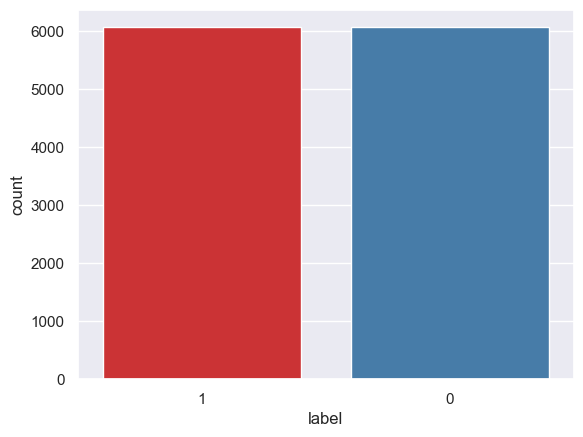

In [36]:
# Set the aesthetic style of the plots
sns.set(style="darkgrid")

# Create a count plot of the 'Email Type' column
# plt.figure(figsize=(10, 10))
# sns.countplot(x='label', data=emails_df, palette='viridis')
sns.countplot(x = 'label', data = emails_df, palette = 'Set1')

# Set the title and labels
# plt.title('Distribution of Email Types', fontsize=20)
# plt.xlabel('label', fontsize=20)
# plt.ylabel('Count', fontsize=20)

# Display the plot
plt.show()

### **3. Balancing Data**

In [27]:
# Separate the classes
phishing_emails = emails_df[emails_df['label'] == '1']
legitimate_emails = emails_df[emails_df['label'] == '0']

# Downsample the majority class
legitimate_emails_downsampled = legitimate_emails.sample(len(phishing_emails), random_state=42)

# Combine the balanced datasets
emails_df = pd.concat([phishing_emails, legitimate_emails_downsampled])

label
1    6067
0    6067
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

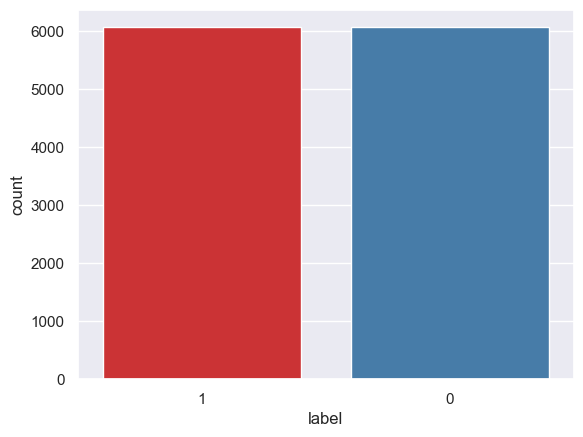

In [28]:
# Check the distribution of labels
print(emails_df['label'].value_counts())

sns.countplot(x = 'label', data = emails_df, palette = 'Set1')

### **4. Text Preprocessing**

#### 4.1. Clean HTML Content: Remove or escape special characters and HTML tags.
#### 4.2. Replace Escape Sequences: Ensure that newline characters and other escape sequences are handled properly.

In [36]:
# Function to clean HTML content
def clean_html(raw_html):
    # Remove HTML tags
    clean_text = BeautifulSoup(raw_html, "html.parser").get_text()
    # Escape HTML entities
    clean_text = html.escape(clean_text)
    return clean_text

# Apply the function to clean the 'Email Text' column
emails_df['cleaned_text'] = emails_df['text'].apply(clean_html)

/var/folders/zg/35ghknm958b4ltq43qlvw2dh0000gn/T/ipykernel_36743/225815545.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_text = BeautifulSoup(raw_html, "html.parser").get_text()
/var/folders/zg/35ghknm958b4ltq43qlvw2dh0000gn/T/ipykernel_36743/225815545.py:4: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  clean_text = BeautifulSoup(raw_html, "html.parser").get_text()


In [37]:
# Function to replace escape sequences
def replace_escape_sequences(text):
    # Replace newline characters
    text = text.replace('\n', ' ')
    # Replace other escape sequences as needed
    text = text.replace('\r', ' ').replace('\t', ' ')
    return text

# Apply the function to clean escape sequences in the 'cleaned_text' column
emails_df['cleaned_text'] = emails_df['cleaned_text'].apply(replace_escape_sequences)

In [ ]:
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')

In [38]:
# Verify the changes
print(emails_df[['text', 'cleaned_text']].head())

                                                text  \
0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1  the other side of * galicismos * * galicismo *...   
2  re : equistar deal tickets are you still avail...   
3  \nHello I am your hot lil horny toy.\n    I am...   
4  software at incredibly low prices ( 86 % lower...   

                                        cleaned_text  
0  re : 6 . 1100 , disc : uniformitarianism , re ...  
1  the other side of * galicismos * * galicismo *...  
2  re : equistar deal tickets are you still avail...  
3   Hello I am your hot lil horny toy.     I am t...  
4  software at incredibly low prices ( 86 % lower...  


In [39]:
emails_df.head(10)

,text,label,cleaned_text
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,"re : 6 . 1100 , disc : uniformitarianism , re ..."
1,the other side of * galicismos * * galicismo *...,0,the other side of * galicismos * * galicismo *...
2,re : equistar deal tickets are you still avail...,0,re : equistar deal tickets are you still avail...
3,\nHello I am your hot lil horny toy.\n I am...,1,Hello I am your hot lil horny toy. I am t...
4,software at incredibly low prices ( 86 % lower...,1,software at incredibly low prices ( 86 % lower...
6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",0,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint..."
8,"we owe you lots of money dear applicant , afte...",1,"we owe you lots of money dear applicant , afte..."
9,re : coastal deal - with exxon participation u...,0,re : coastal deal - with exxon participation u...
10,make her beg you to give it to her everynight ...,1,make her beg you to give it to her everynight ...
11,"URL: http://www.newsisfree.com/click/-5,830431...",0,"URL: http://www.newsisfree.com/click/-5,830431..."


#### 4.3. Tokenization: Splitting the email text into individual tokens (words or subwords).
#### 4.4. Stop-word Removal: Removing common words that do not contribute to the phishing detection.
#### 4.5. Lemmatization/Stemming: Reducing words to their base or root form.

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a single string
    return ' '.join(tokens)

# Apply the text preprocessing function to the correct column
emails_df['processed_text'] = emails_df['Email Text'].apply(preprocess_text)  # Replace 'Email Text' with the correct column name

#### 4.6. continue

In [40]:
# Display the first few processed texts
emails_df.head()

,text,label,cleaned_text
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,"re : 6 . 1100 , disc : uniformitarianism , re ..."
1,the other side of * galicismos * * galicismo *...,0,the other side of * galicismos * * galicismo *...
2,re : equistar deal tickets are you still avail...,0,re : equistar deal tickets are you still avail...
3,\nHello I am your hot lil horny toy.\n I am...,1,Hello I am your hot lil horny toy. I am t...
4,software at incredibly low prices ( 86 % lower...,1,software at incredibly low prices ( 86 % lower...


In [41]:
# Drop the original 'Email Text' column and rename 'processed_text' to 'Email Text'
emails_df = emails_df.drop(columns=['text'])
# balanced_emails_df = balanced_emails_df.rename(columns={'processed_text': 'Email Text'})

In [42]:
# Reset the index if desired
emails_df.reset_index(drop=True, inplace=True)

In [43]:
# Display the first few processed texts
emails_df.head()

,label,cleaned_text
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ..."
1,0,the other side of * galicismos * * galicismo *...
2,0,re : equistar deal tickets are you still avail...
3,1,Hello I am your hot lil horny toy. I am t...
4,1,software at incredibly low prices ( 86 % lower...


In [44]:
cols = emails_df.columns.tolist()
cols

['label', 'cleaned_text']

In [45]:
cols = cols[-1:] + cols[:-1]
cols

['cleaned_text', 'label']

In [46]:
emails_df=emails_df[cols]


In [47]:
emails_df = emails_df.rename(columns={'cleaned_text': 'text'})

In [48]:
# Verify the changes
print(emails_df)

                                                    text label
0      re : 6 . 1100 , disc : uniformitarianism , re ...     0
1      the other side of * galicismos * * galicismo *...     0
2      re : equistar deal tickets are you still avail...     0
3       Hello I am your hot lil horny toy.     I am t...     1
4      software at incredibly low prices ( 86 % lower...     1
...                                                  ...   ...
15448  URL: http://diveintomark.org/archives/2002/09/...     0
15449  date a lonely housewife always wanted to date ...     1
15450  request submitted : access request for anita ....     0
15451  re : important - prc mtg hi dorn &amp; john , ...     0
15452  press clippings - letter on californian utilit...     0

[15453 rows x 2 columns]


label
0    9386
1    6067
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

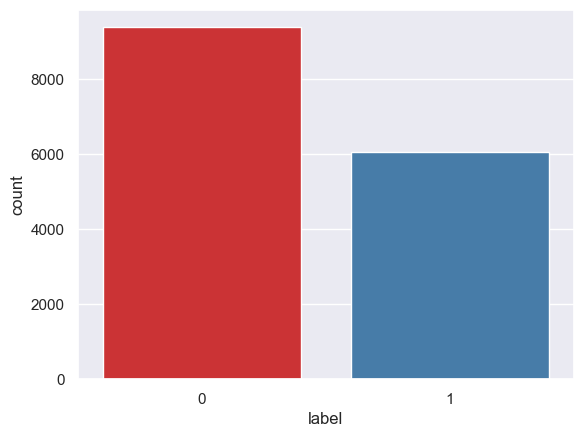

In [49]:
# Check the distribution of labels
print(emails_df['label'].value_counts())

sns.countplot(x = 'label', data = emails_df, palette = 'Set1')

### **5. Convert the DataFrame to JSON format**

archive


In [50]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
train_df, validation_df = train_test_split(emails_df, test_size=0.2, random_state=42)

# Verify the splits
print(f'Training set size: {len(train_df)}')
print(f'Validation set size: {len(validation_df)}')

Training set size: 12362
Validation set size: 3091


In [51]:
train_df.head()

,text,label
15240,It doesn&#x27;t really matter since they&#x27;...,0
3647,www.low-interest-rates.net Â Â Â Â Â Â quotepo...,1
8451,home delivery cia &quot; lis soft ` tabs new c...,1
2318,link correction : 10 million $ sweepstakes dow...,1
5960,julies cam info hi . . . . my name is julie . ...,1


In [52]:
# Save training dataset to CSV
train_df.to_csv('email_train_dataset_unbalance.csv', index=False)

# Save validation dataset to CSV
validation_df.to_csv('email_validation_dataset_unbalance.csv', index=False)

In [ ]:
df_json = validation_df.to_json(orient='records', lines=True)

# Save the JSON data to a file (optional, adjust the file path as needed)
with open('cleaned_dataset.json', 'w') as file:
    file.write(df_json)

In [ ]:
# Load the dataset
train_df = pd.read_csv('email_train_dataset.csv')  # Adjust the file path as needed

# Display the first few rows of the dataset
train_df.head()

In [ ]:
# Check the distribution of labels
print(train_df['label'].value_counts())

sns.countplot(x = 'label', data = train_df, palette = 'Set1')

In [ ]:
# Load the dataset
validation_df = pd.read_csv('email_validation_dataset.csv')  # Adjust the file path as needed

# Display the first few rows of the dataset
validation_df.head()

In [ ]:
# Check the distribution of labels
print(validation_df['label'].value_counts())

sns.countplot(x = 'label', data = validation_df, palette = 'Set1')